In [10]:
import import_ipynb

from model import make_model
from dataset_loader import get_dataset
from dataset_loader import get_validation_dataset

import keras

In [13]:
model = make_model(input_shape=(255,255,3), num_classes=3)
keras.utils.plot_model(model, show_shapes=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
]

epochs = 100

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

train_ds = get_dataset()
val_ds = get_validation_dataset()

# 이미지 개수에 따른 가중치
class_weights = {0: 1.15, 1: 0.77, 2: 1.21}

train_result = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
    class_weight=class_weights
)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 480s 8s/step - acc: 0.8968 - loss: 0.2885 - val_acc: 0.4916 - val_loss: 1.0941
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 480s 8s/step - acc: 0.9895 - loss: 0.0432 - val_acc: 0.4559 - val_loss: 1.0890
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 511s 8s/step - acc: 0.9963 - loss: 0.0180 - val_acc: 0.4559 - val_loss: 1.1006
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 484s 8s/step - acc: 0.9984 - loss: 0.0130 - val_acc: 0.4559 - val_loss: 1.1434
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 465s 8s/step - acc: 0.9990 - loss: 0.0104 - val_acc: 0.4559 - val_loss: 1.2552
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 434s 7s/step - acc: 0.9995 - loss: 0.0076 - val_acc: 0.4559 - val_loss: 1.4356
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 444s 7s/step - acc: 0.9984 - loss: 0.0079 - val_acc: 0.4559 - val_loss: 1.6704


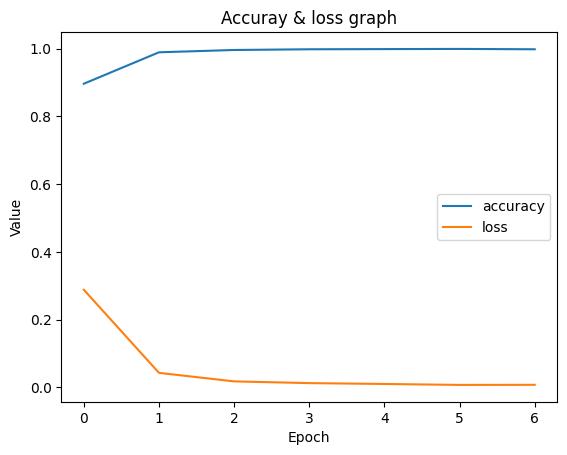

In [14]:
import matplotlib.pyplot as plt

plt.plot(train_result.history['acc'])
plt.plot(train_result.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.title('Accuray & loss graph')

plt.show()

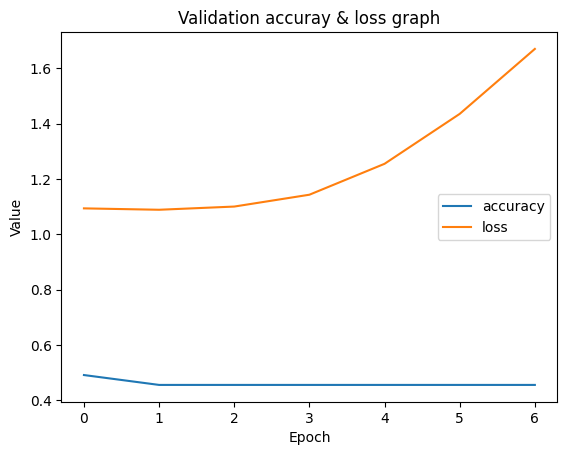

In [15]:
plt.plot(train_result.history['val_acc'])
plt.plot(train_result.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.title('Validation accuray & loss graph')

plt.show()